# Project: Book Rating Prediction Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

## 1. Load dataset

In [2]:
# raise a warning when a bad line (a line with too many fields) is encountered and skip that line
df = pd.read_csv("books.csv", on_bad_lines='warn')

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


## 2. Dataset analysis

In [4]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


#### Data distribution

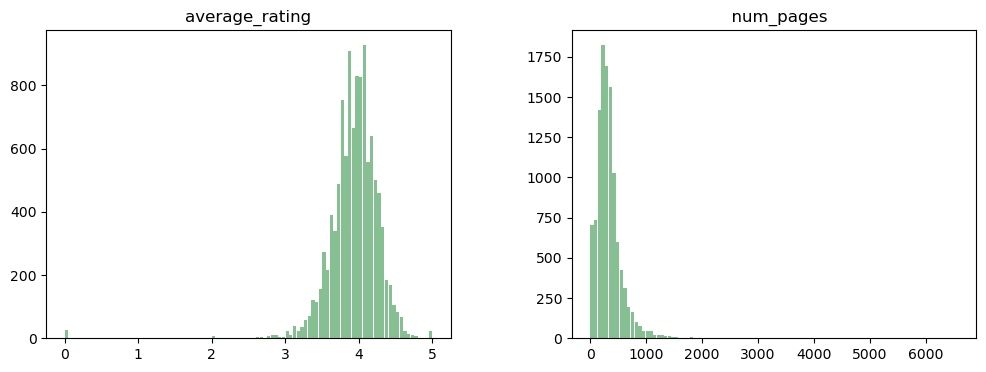

In [5]:
df.hist(column=["average_rating", "  num_pages"], 
        bins=100, grid=False, figsize=(12,4), color='#86bf91', rwidth=0.9)
plt.show()

#### Plotting each dimension against the target

In [6]:
df[["  num_pages", "average_rating", "ratings_count"]].corr()

,num_pages,average_rating,ratings_count
num_pages,1.000000,0.150477,0.034337
average_rating,0.150477,1.000000,0.038224
ratings_count,0.034337,0.038224,1.000000


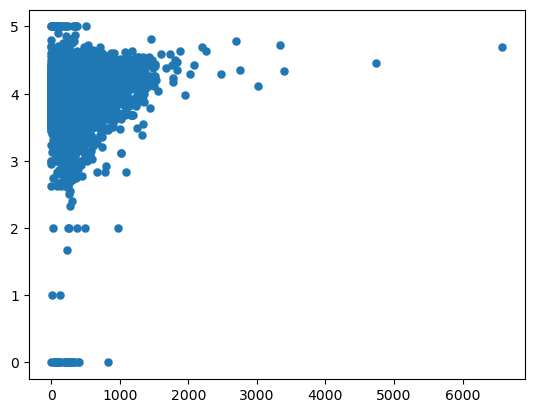

In [7]:
plt.scatter(df["  num_pages"], df["average_rating"], linewidths=0.1)

In [8]:
(df['average_rating'] < 1).sum()

25

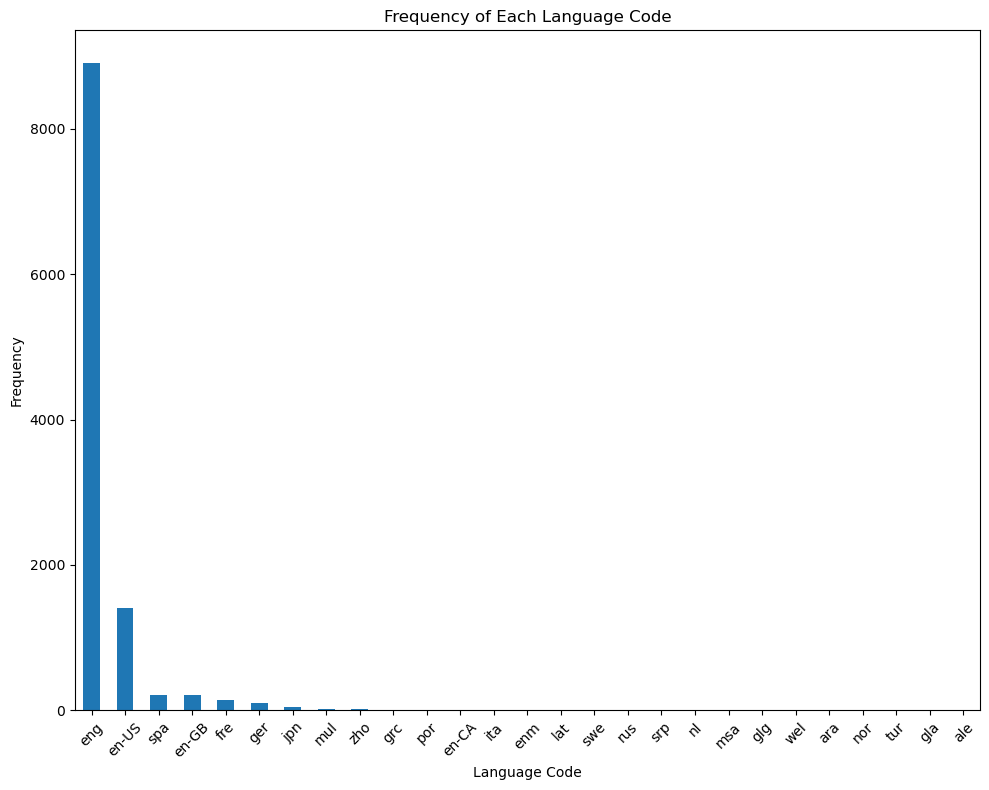

In [9]:
# Counting the frequency of each language code
language_counts = df['language_code'].value_counts()

# Creating a bar chart for the language codes
plt.figure(figsize=(10, 8))
language_counts.plot(kind='bar')
plt.title('Frequency of Each Language Code')
plt.xlabel('Language Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

In [10]:
df['language_code'].value_counts()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

## 3 Pre-Processing

#### Removing irrelevant feature

In [11]:
df = df.drop(['bookID', 'title', 'isbn', 'isbn13'], axis = 1)

#### Removing unnecessary spaces

In [12]:
df.rename(columns=lambda x: x.strip(), inplace=True)

#### Filtering 

In [13]:
df.query("ratings_count >= 20", inplace=True)

In [14]:
df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,10015.000000,10015.000000,1.001500e+04,10015.000000
mean,3.948481,343.744284,1.992705e+04,601.915926
std,0.272291,240.260218,1.183928e+05,2708.791873
min,2.400000,0.000000,2.000000e+01,0.000000
25%,3.780000,205.000000,2.045000e+02,16.000000
50%,3.960000,304.000000,1.081000e+03,64.000000
75%,4.130000,420.000000,6.190000e+03,290.000000
max,4.820000,6576.000000,4.597666e+06,94265.000000


In [15]:
def preprocess_author_name(author_name):
    # Supprimer les espaces dans le nom d'auteur et supprimer les caractères précédant le "/"
    return author_name.replace(" ", "").split("/")[0]

# Appliquer la fonction à la colonne des noms d'auteur
df['authors'] = df['authors'].apply(lambda x: preprocess_author_name(x))

In [16]:
df.nunique()

authors               3735
average_rating         191
language_code           24
num_pages              981
ratings_count         5274
text_reviews_count    1822
publication_date      3403
publisher             1944
dtype: int64

In [17]:
df.to_csv('nouveau_fichier.csv', index=False)

#### Fusion

#### Data encoding

In [18]:
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce')
df = df.dropna(subset=['publication_date'])
df['publication_date'] = df['publication_date'].apply(lambda x: x.timestamp())

In [19]:
labelEncode = preprocessing.LabelEncoder()
df['authors'] = labelEncode.fit_transform(df['authors'])
df['language_code'] = labelEncode.fit_transform(df['language_code'])
df['publisher'] = labelEncode.fit_transform(df['publisher'])

#### Normalization

## Linear regression

In [20]:
X = df.drop('average_rating', axis = 1)
y = df['average_rating']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = linReg.predict(X_test)

In [22]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))

Mean Absolute Error (MAE): 0.2096992566095693
Mean Squared Error (MSE): 0.07191442925696298


In [23]:
linReg.score(X, y)

0.043462492332141944

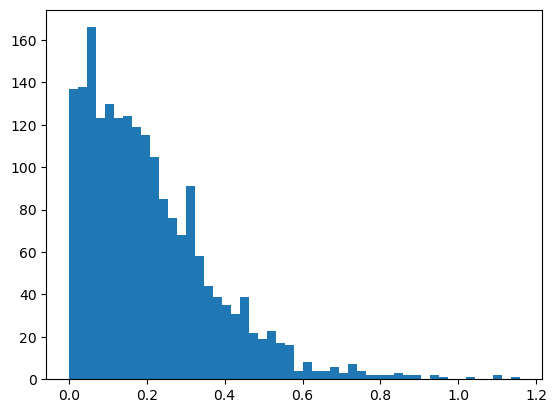

In [24]:
err_hist = np.abs(y_test-y_pred)
plt.hist(err_hist, bins=50)
plt.show()

## KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Créer le classificateur KNN
k = 5  # Nombre de voisins
knn_classifier = KNeighborsClassifier(n_neighbors=k)

y_discretized = pd.cut(y, 100, labels=False)

X_train, X_test, y_train, y_test = train_test_split(X, y_discretized, test_size=0.2, random_state=42) 

# Entraîner le classificateur KNN
knn_classifier.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = knn_classifier.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN:", accuracy)

print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
knn_classifier.score(X_train, y_train)

Précision du modèle KNN: 0.024463305042436344
Mean Absolute Error (MAE): 15.61258112830754
Mean Squared Error (MSE): 375.60858711932104


0.24466358756709525